# Process Rosbag and plot

In [1]:
# Auto Reload Modules
%load_ext autoreload
%autoreload 2

import glob
import numpy as np
import matplotlib.pyplot as plt

from bag_utils import extract_traj
from plot_utils import plot_map_2d, plot_map_3d

np.random.seed(0)

## Load bag and extract data

In [2]:
bag_files = glob.glob("./bag_data/*.bag")
print("Found bags:", bag_files)

Found bags: ['./bag_data/barc_run_strategy_obca_2020-10-23-11-56-32_exp_6.bag']


In [4]:
bag_num = 0

FSM, EV, TV = extract_traj(bag_files[bag_num])

Number of topics: 48
Trajectory Extraction Finished


## Visualizer

### Plot the EV and TV trajectoies

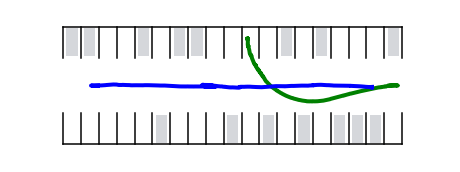

In [5]:
fig_name = "ParkingLot2D"
x_boundary = [-0.1, 6.1]
y_boundary = [-1.5, 1.5]

# Generate occupancy randomly
occupancy = np.random.rand(2, 19)
occupancy[occupancy <= 0.5] = 0
occupancy[occupancy > 0.5] = 1
# Set the destination of target vehicle to be empty
occupancy[0, 10] = 0


fig = plt.figure(fig_name, figsize=(6.5, 2.5))

plot_map_2d(fig_name, occupancy=occupancy)

plt.plot(TV.x, TV.y, linewidth=4, color='g')
plt.plot(EV.x, EV.y, linewidth=4, color='b')

plt.axis("equal")
plt.xlim(x_boundary)
plt.ylim(y_boundary)

ax = plt.gca()
ax.set_axis_off()
fig.tight_layout()

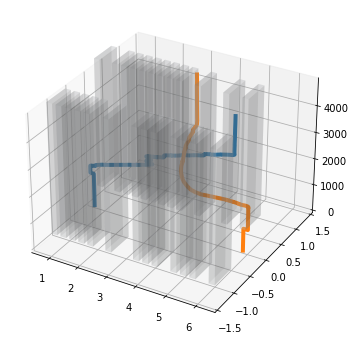

In [8]:
fig_name = "ParkingLot3D"

# Generate occupancy randomly
occupancy = np.random.rand(2, 19)
occupancy[occupancy <= 0.5] = 0
occupancy[occupancy > 0.5] = 1
# Set the destination of target vehicle to be empty
occupancy[0, 10] = 0

fig = plt.figure(fig_name, figsize=(6, 6))

# plot_map_3d(fig_name, occupancy=occupancy)
plot_map_3d(fig_name, height=len(EV.x), occupancy=occupancy)

ax = plt.gca()

ax.plot3D(EV.x, EV.y, np.arange(len(EV.x)), linewidth=4)
ax.plot3D(TV.x, TV.y, np.arange(len(TV.x)), linewidth=4)


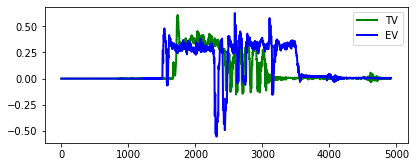

In [13]:
fig_name = "Speed"
fig = plt.figure(fig_name, figsize=(6.5, 2.5))
plt.plot(TV.v, linewidth=2, color='g', label="TV")
plt.plot(EV.v, linewidth=2, color='b', label="EV")
plt.legend()